# 연구

## 전처리 알고리즘 비교

/tmp/ipykernel_67229/1067431056.py:15: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(cqt, sr=sr, x_axis='time', y_axis='cqt_note')
/tmp/ipykernel_67229/1067431056.py:15: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  librosa.display.specshow(cqt, sr=sr, x_axis='time', y_axis='cqt_note')
/tmp/ipykernel_67229/1067431056.py:19: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(stft, sr=sr, x_axis='time', y_axis='log')


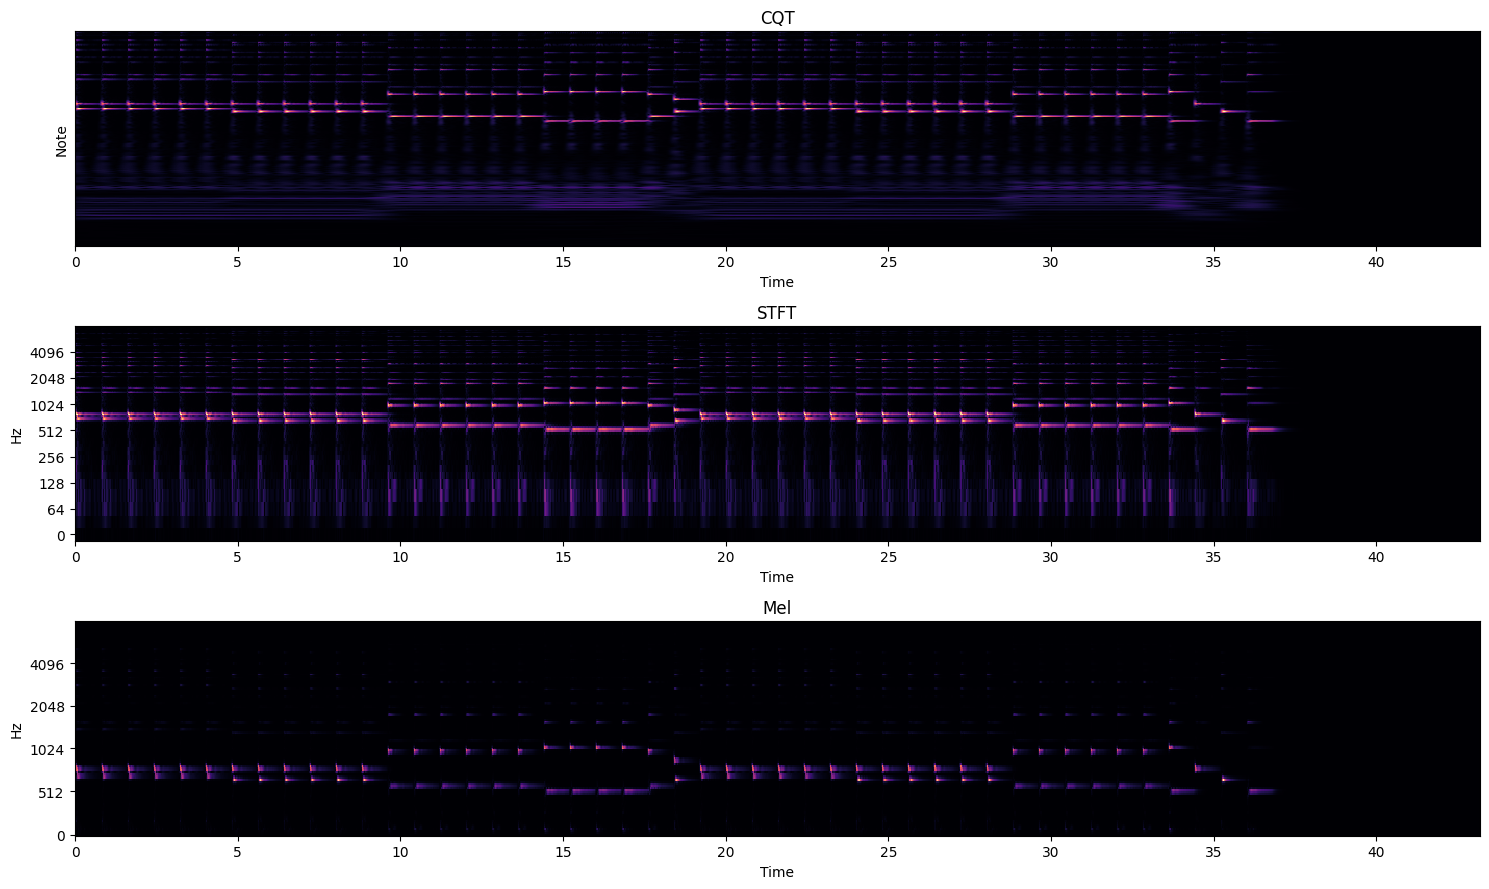

cqt: (1350, 264), stft: (1350, 257), mel: (1350, 128)
40 40 40
cqt: (1400, 264), stft: (1400, 257), mel: (1400, 128)
cqt: (14, 100, 264), stft: (14, 100, 257), mel: (14, 100, 128)


In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# 오디오 파일 로드
file_path = 'data/chopsticks.mp3'
y, sr = librosa.load(file_path, sr=16000)
cqt = librosa.cqt(y, sr=sr, fmin=librosa.midi_to_hz(21), n_bins=264, hop_length=160, bins_per_octave=36)
stft = librosa.stft(y, n_fft=512, hop_length=160)
mel = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=512, hop_length=160, n_mels=128, fmax=8000)

plt.figure(figsize=(15, 9))

plt.subplot(3, 1, 1)
librosa.display.specshow(cqt, sr=sr, x_axis='time', y_axis='cqt_note')
plt.title('CQT')

plt.subplot(3, 1, 2)
librosa.display.specshow(stft, sr=sr, x_axis='time', y_axis='log')
plt.title('STFT')

plt.subplot(3, 1, 3)
librosa.display.specshow(mel, sr=sr, x_axis='time', y_axis='mel')
plt.title('Mel')

plt.tight_layout()
plt.show()

cqt = np.abs(cqt).T
stft = np.abs(stft).T
mel =np.abs(mel.T)

print(f'cqt: {cqt.shape}, stft: {stft.shape}, mel: {mel.shape}')

cqt = np.pad(cqt, ((0, 10), (0, 0)), mode='constant')
stft = np.pad(stft, ((0, 10), (0, 0)), mode='constant')
mel = np.pad(mel, ((0, 10), (0, 0)), mode='constant')

one_seq = 100
cqt_pad_size = one_seq - (cqt.shape[0] % one_seq)
stft_pad_size = one_seq - (stft.shape[0] % one_seq)
mel_pad_size = one_seq - (mel.shape[0] % one_seq)

print(cqt_pad_size, stft_pad_size, mel_pad_size)

cqt = np.pad(cqt, ((0, cqt_pad_size), (0, 0)), mode='constant')
stft = np.pad(stft, ((0, stft_pad_size), (0, 0)), mode='constant')
mel = np.pad(mel, ((0, mel_pad_size), (0, 0)), mode='constant')

print(f'cqt: {cqt.shape}, stft: {stft.shape}, mel: {mel.shape}')

cqt = cqt.reshape(cqt.shape[0] // one_seq, one_seq, 264)
stft = stft.reshape(stft.shape[0] // one_seq, one_seq, 257)
mel = mel.reshape(mel.shape[0] // one_seq, one_seq, 128)

print(f'cqt: {cqt.shape}, stft: {stft.shape}, mel: {mel.shape}')

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_7016\3391184066.py:31: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  librosa.display.specshow(db_cqt, sr=sr, x_axis='time', y_axis='cqt_note')


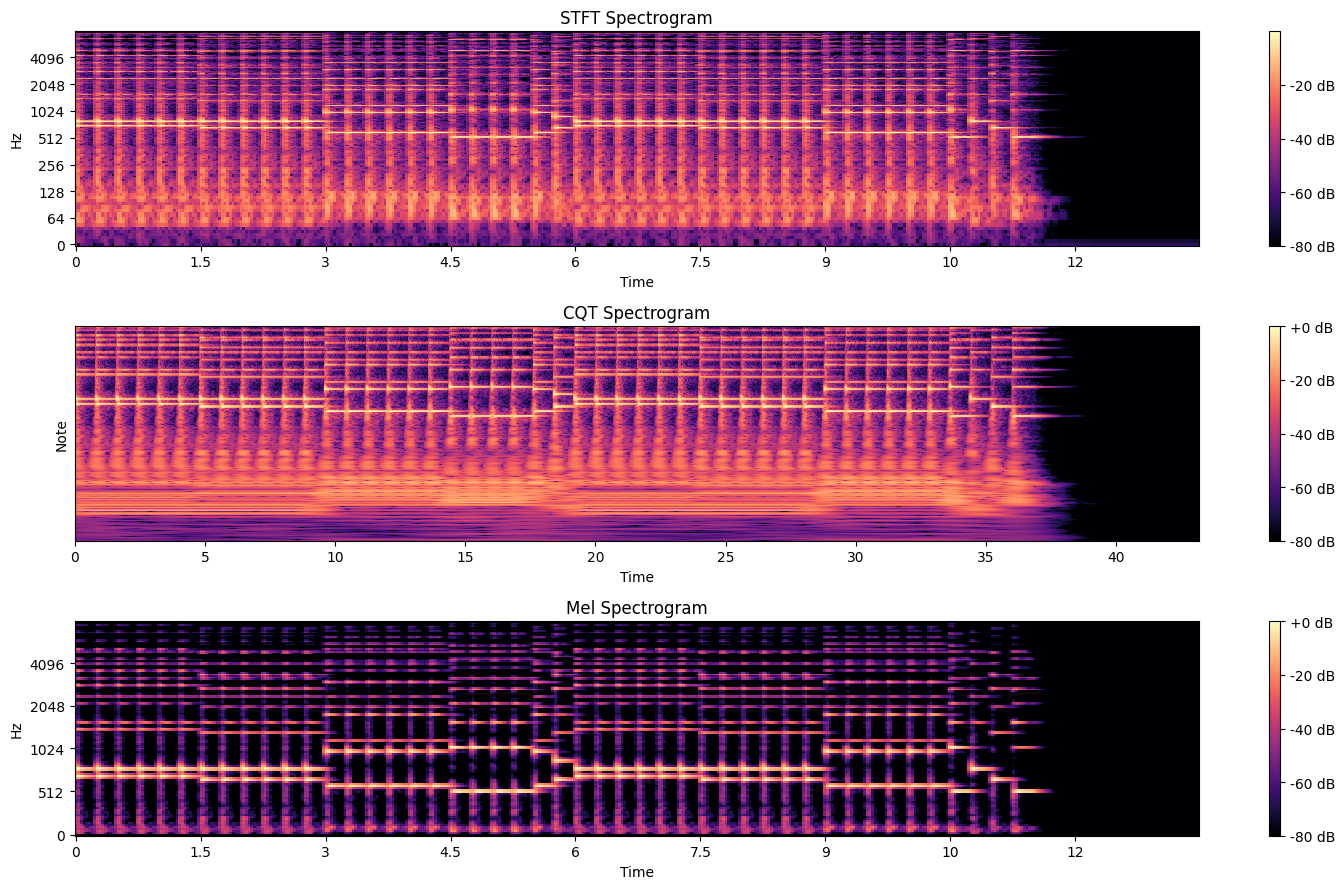

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# 오디오 파일 로드
file_path = 'sample_data/Chopsticks.mp3'
y, sr = librosa.load(file_path, sr=16000)

# STFT
stft = np.abs(librosa.stft(y, n_fft=2048, hop_length=512))
db_stft = librosa.amplitude_to_db(stft, ref=np.max)

# CQT
cqt = np.abs(librosa.cqt(y, sr=sr, fmin=librosa.midi_to_hz(21), n_bins=264, hop_length=160, bins_per_octave=36))
db_cqt = librosa.amplitude_to_db(cqt, ref=np.max)

# Mel Spectrogram
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
db_mel_spect = librosa.amplitude_to_db(mel_spect, ref=np.max)

# 시각화
plt.figure(figsize=(15, 9))

plt.subplot(3, 1, 1)
librosa.display.specshow(db_stft, sr=sr, x_axis='time', y_axis='log')
plt.title('STFT Spectrogram')
plt.colorbar(format='%+2.0f dB')

plt.subplot(3, 1, 2)
librosa.display.specshow(db_cqt, sr=sr, x_axis='time', y_axis='cqt_note')
plt.title('CQT Spectrogram')
plt.colorbar(format='%+2.0f dB')

plt.subplot(3, 1, 3)
librosa.display.specshow(db_mel_spect, sr=sr, x_axis='time', y_axis='mel')
plt.title('Mel Spectrogram')
plt.colorbar(format='%+2.0f dB')

plt.tight_layout()
plt.show()



In [ ]:
import note_seq
note_seq.midi_file_to_note_sequence()

In [8]:
import tensorflow as tf
print(tf.test.is_built_with_cuda())
print(tf.test.is_built_with_gpu_support())
print(tf.test.is_gpu_available())
print(tf.config.list_physical_devices('GPU'))


True
True
True
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [9]:
import tensorflow as tf

tf.debugging.set_log_device_placement(True)

# 텐서 생성
a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
c = tf.matmul(a, b)

print(c)

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op MatMul in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [37]:
import pandas as pd
import numpy as np
import pretty_midi
import librosa
import os

data_dir = 'maestro_data/maestro-v3.0.0'

# 데이터 준비 함수
def load_audio(file_path, sample_rate=16000):
    audio, _ = librosa.load(file_path, sr=sample_rate, mono=True)
    return audio

def load_midi(file_path):
    midi_data = pretty_midi.PrettyMIDI(file_path)
    return midi_data

def midi_to_piano_roll(midi_data, sample_rate=16000, frame_size=512):
    piano_roll = midi_data.get_piano_roll(fs=sample_rate // frame_size)
    return piano_roll

def pad_or_trim(array, target_length):
    if array.shape[0] > target_length:
        return array[:target_length]
    elif array.shape[0] < target_length:
        padding = target_length - array.shape[0]
        return np.pad(array, ((0, padding), (0, 0)), mode='constant')
    else:
        return array

# 데이터 로드 및 전처리
def load_and_preprocess_data(row, sample_rate=16000, n_mels=229, hop_length=512, target_length=256):
    audio = load_audio(os.path.join(data_dir, row['audio_filename']), sample_rate)
    midi_data = load_midi(os.path.join(data_dir, row['midi_filename']))
    piano_roll = midi_to_piano_roll(midi_data, sample_rate)

    # Mel-spectrogram 계산
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sample_rate, n_mels=n_mels, hop_length=hop_length)
    mel_spectrogram = mel_spectrogram.T  # Transpose to shape (time, mel)
    
    mel_spectrogram = pad_or_trim(mel_spectrogram, target_length)
    mel_spectrogram = np.expand_dims(mel_spectrogram, axis=-1)  # 채널 차원 추가

    piano_roll = pad_or_trim(piano_roll.T, target_length)

    return mel_spectrogram, piano_roll

# 메타데이터 로드
metadata_file = os.path.join(data_dir, 'maestro-v3.0.0.csv')
metadata = pd.read_csv(metadata_file)

# 저장 경로 설정
output_dir = 'maestro_data/processed_data'
os.makedirs(output_dir, exist_ok=True)

# 데이터 전처리 및 저장
target_length = 256  # 모든 샘플의 타임스텝을 이 길이로 맞춤
for idx, row in metadata.iterrows():
    mel_spectrogram, piano_roll = load_and_preprocess_data(row, target_length=target_length)
    np.save(os.path.join(output_dir, f'X_{idx}.npy'), mel_spectrogram)
    np.save(os.path.join(output_dir, f'y_onset_{idx}.npy'), piano_roll)
    np.save(os.path.join(output_dir, f'y_frame_{idx}.npy'), (piano_roll > 0))


In [1]:
import tensorflow as tf

# 모델 정의
class OnsetsAndFrames(tf.keras.Model):
    def __init__(self):
        super(OnsetsAndFrames, self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(48, (3, 3), activation='relu', padding='same')
        self.conv2 = tf.keras.layers.Conv2D(48, (3, 3), activation='relu', padding='same')
        self.conv3 = tf.keras.layers.Conv2D(96, (3, 3), activation='relu', padding='same')
        self.bilstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True))
        self.dense_onset = tf.keras.layers.Dense(88, activation='sigmoid')
        self.dense_frame = tf.keras.layers.Dense(88, activation='sigmoid')

    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.conv2(x)
        x = self.conv3(x)
        x = tf.reshape(x, (x.shape[0], -1, x.shape[-1]))
        x = self.bilstm(x)
        onset_pred = self.dense_onset(x)
        frame_pred = self.dense_frame(x)
        return onset_pred, frame_pred

In [9]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "0" # GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1" # CPU

if tf.test.gpu_device_name():
    print('GPU found')
else:
    print("No GPU found")

GPU found


In [10]:
import os
import numpy as np
import tensorflow as tf
import pandas as pd

# os.environ["CUDA_VISIBLE_DEVICES"] = "0" # GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "-1" # CPU

class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self, data_dir, metadata, batch_size=32, sample_rate=16000, n_mels=229, hop_length=512, shuffle=True):
        self.data_dir = data_dir
        self.metadata = metadata
        self.batch_size = batch_size
        self.sample_rate = sample_rate
        self.n_mels = n_mels
        self.hop_length = hop_length
        self.shuffle = shuffle
        self.indices = np.arange(len(self.metadata))
        self.on_epoch_end()

    def __len__(self):
        return int(np.floor(len(self.metadata) / self.batch_size))

    def __getitem__(self, index):
        indices = self.indices[index*self.batch_size:(index+1)*self.batch_size]
        X, y_onset, y_frame = self.__data_generation(indices)
        return X, {'dense_onset': y_onset, 'dense_frame': y_frame}

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indices)

    def __data_generation(self, indices):
        X = []
        y_onset = []
        y_frame = []
        
        for idx in indices:
            X.append(np.load(os.path.join(self.data_dir, 'processed_data', f'X_{idx}.npy')))
            y_onset.append(np.load(os.path.join(self.data_dir, 'processed_data', f'y_onset_{idx}.npy')))
            y_frame.append(np.load(os.path.join(self.data_dir, 'processed_data', f'y_frame_{idx}.npy')))

        return np.array(X), np.array(y_onset), np.array(y_frame)
    
# 메타데이터 로드
data_dir = 'maestro_data/maestro-v3.0.0'
metadata_file = os.path.join(data_dir, 'maestro-v3.0.0.csv')
metadata = pd.read_csv(metadata_file)

# 메타데이터에서 학습용 데이터만 선택
train_metadata = metadata[metadata['split'] == 'train']

# 데이터 제네레이터 생성
batch_size = 32
train_generator = DataGenerator('maestro_data', train_metadata, batch_size=batch_size)

with tf.device('/CPU:0'):
    # 모델 인스턴스화 및 컴파일
    model = OnsetsAndFrames()
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # 모델 학습
    model.fit(train_generator, epochs=10)

print("Model training completed.")


Epoch 1/10


TypeError: in user code:

    File "c:\Users\SSAFY\workspace\S11P12B103\backend\transcriber\.venv\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\SSAFY\workspace\S11P12B103\backend\transcriber\.venv\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\SSAFY\workspace\S11P12B103\backend\transcriber\.venv\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\SSAFY\workspace\S11P12B103\backend\transcriber\.venv\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\SSAFY\workspace\S11P12B103\backend\transcriber\.venv\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\SSAFY\AppData\Local\Temp\__autograph_generated_filevxo0p8gj.py", line 13, in tf__call
        x = ag__.converted_call(ag__.ld(tf).reshape, (ag__.ld(x), (ag__.ld(x).shape[0], -1, ag__.ld(x).shape[-1])), None, fscope)

    TypeError: Exception encountered when calling layer "onsets_and_frames_2" "                 f"(type OnsetsAndFrames).
    
    in user code:
    
        File "C:\Users\SSAFY\AppData\Local\Temp\ipykernel_15168\809276589.py", line 18, in call  *
            x = tf.reshape(x, (x.shape[0], -1, x.shape[-1]))
    
        TypeError: Failed to convert elements of (None, -1, 96) to Tensor. Consider casting elements to a supported type. See https://www.tensorflow.org/api_docs/python/tf/dtypes for supported TF dtypes.
    
    
    Call arguments received by layer "onsets_and_frames_2" "                 f"(type OnsetsAndFrames):
      • inputs=tf.Tensor(shape=(None, None, None, None), dtype=float32)


# 최종시도

In [12]:
import pandas as pd
import numpy as np
import pretty_midi
import librosa
import os

data_dir = 'maestro_data/maestro-v3.0.0'

# 데이터 준비 함수
def load_audio(file_path, sample_rate=16000):
    audio, _ = librosa.load(file_path, sr=sample_rate, mono=True)
    return audio

def load_midi(file_path):
    midi_data = pretty_midi.PrettyMIDI(file_path)
    return midi_data

def midi_to_piano_roll(midi_data, sample_rate=16000, frame_size=512):
    piano_roll = midi_data.get_piano_roll(fs=sample_rate // frame_size)
    return piano_roll

def pad_or_trim(array, target_length):
    if array.shape[0] > target_length:
        return array[:target_length]
    elif array.shape[0] < target_length:
        padding = target_length - array.shape[0]
        return np.pad(array, ((0, padding), (0, 0)), mode='constant')
    else:
        return array

# 데이터 로드 및 전처리
def load_and_preprocess_data(row, sample_rate=16000, n_mels=229, hop_length=512, target_length=256):
    audio = load_audio(os.path.join(data_dir, row['audio_filename']), sample_rate)
    midi_data = load_midi(os.path.join(data_dir, row['midi_filename']))
    piano_roll = midi_to_piano_roll(midi_data, sample_rate)

    # Mel-spectrogram 계산
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sample_rate, n_mels=n_mels, hop_length=hop_length)
    mel_spectrogram = mel_spectrogram.T  # Transpose to shape (time, mel)
    
    mel_spectrogram = pad_or_trim(mel_spectrogram, target_length)
    mel_spectrogram = np.expand_dims(mel_spectrogram, axis=-1)  # 채널 차원 추가

    piano_roll = pad_or_trim(piano_roll.T, target_length)

    return mel_spectrogram, piano_roll

# 메타데이터 로드
metadata_file = os.path.join(data_dir, 'maestro-v3.0.0.csv')
metadata = pd.read_csv(metadata_file)

# 저장 경로 설정
output_dir = 'maestro_data/processed_data'
os.makedirs(output_dir, exist_ok=True)

# 데이터 전처리 및 저장
target_length = 256  # 모든 샘플의 타임스텝을 이 길이로 맞춤
for idx, row in metadata.iterrows():
    mel_spectrogram, piano_roll = load_and_preprocess_data(row, target_length=target_length)
    np.save(os.path.join(output_dir, f'X_{idx}.npy'), mel_spectrogram)
    np.save(os.path.join(output_dir, f'y_onset_{idx}.npy'), piano_roll)
    np.save(os.path.join(output_dir, f'y_frame_{idx}.npy'), (piano_roll > 0))


In [14]:
import os
import numpy as np
import tensorflow as tf
import pandas as pd

class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self, data_dir, metadata, batch_size=32, shuffle=True):
        self.data_dir = data_dir
        self.metadata = metadata
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indices = np.arange(len(self.metadata))
        self.on_epoch_end()

    def __len__(self):
        return int(np.floor(len(self.metadata) / self.batch_size))

    def __getitem__(self, index):
        indices = self.indices[index*self.batch_size:(index+1)*self.batch_size]
        X, y_onset, y_frame = self.__data_generation(indices)
        return np.array(X), {'dense_onset': np.array(y_onset), 'dense_frame': np.array(y_frame)}

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indices)

    def __data_generation(self, indices):
        X = []
        y_onset = []
        y_frame = []
        
        for idx in indices:
            X.append(np.load(os.path.join(self.data_dir, f'processed_data/X_{idx}.npy')))
            y_onset.append(np.load(os.path.join(self.data_dir, f'processed_data/y_onset_{idx}.npy')))
            y_frame.append(np.load(os.path.join(self.data_dir, f'processed_data/y_frame_{idx}.npy')))

        return X, y_onset, y_frame

# 메타데이터 로드
data_dir = 'maestro_data/maestro-v3.0.0'
metadata_file = os.path.join(data_dir, 'maestro-v3.0.0.csv')
metadata = pd.read_csv(metadata_file)

# 메타데이터에서 학습용 데이터만 선택
train_metadata = metadata[metadata['split'] == 'train']

# 데이터 제네레이터 생성
batch_size = 32
train_generator = DataGenerator('maestro_data', train_metadata, batch_size=batch_size)

# 모델 정의
class OnsetsAndFrames(tf.keras.Model):
    def __init__(self):
        super(OnsetsAndFrames, self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(48, (3, 3), activation='relu', padding='same')
        self.conv2 = tf.keras.layers.Conv2D(48, (3, 3), activation='relu', padding='same')
        self.conv3 = tf.keras.layers.Conv2D(96, (3, 3), activation='relu', padding='same')
        self.bilstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True))
        self.dense_onset = tf.keras.layers.Dense(88, activation='sigmoid')
        self.dense_frame = tf.keras.layers.Dense(88, activation='sigmoid')

    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.conv2(x)
        x = self.conv3(x)
        x = tf.reshape(x, (x.shape[0], -1, x.shape[-1]))
        x = self.bilstm(x)
        onset_pred = self.dense_onset(x)
        frame_pred = self.dense_frame(x)
        return onset_pred, frame_pred

with tf.device('/CPU:0'):
    # 모델 인스턴스화 및 컴파일
    model = OnsetsAndFrames()
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # 모델 학습
    model.fit(train_generator, epochs=10)

print("Model training completed.")


Epoch 1/10


TypeError: in user code:

    File "c:\Users\SSAFY\workspace\S11P12B103\backend\transcriber\.venv\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\SSAFY\workspace\S11P12B103\backend\transcriber\.venv\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\SSAFY\workspace\S11P12B103\backend\transcriber\.venv\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\SSAFY\workspace\S11P12B103\backend\transcriber\.venv\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\SSAFY\workspace\S11P12B103\backend\transcriber\.venv\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\SSAFY\AppData\Local\Temp\__autograph_generated_file5t66hvjl.py", line 13, in tf__call
        x = ag__.converted_call(ag__.ld(tf).reshape, (ag__.ld(x), (ag__.ld(x).shape[0], -1, ag__.ld(x).shape[-1])), None, fscope)

    TypeError: Exception encountered when calling layer "onsets_and_frames_4" "                 f"(type OnsetsAndFrames).
    
    in user code:
    
        File "C:\Users\SSAFY\AppData\Local\Temp\ipykernel_15168\3032150624.py", line 66, in call  *
            x = tf.reshape(x, (x.shape[0], -1, x.shape[-1]))
    
        TypeError: Failed to convert elements of (None, -1, 96) to Tensor. Consider casting elements to a supported type. See https://www.tensorflow.org/api_docs/python/tf/dtypes for supported TF dtypes.
    
    
    Call arguments received by layer "onsets_and_frames_4" "                 f"(type OnsetsAndFrames):
      • inputs=tf.Tensor(shape=(None, None, None, None), dtype=float32)


In [10]:
import numpy as np

cqt = np.load('data/preprocessed/testX/cqt/MIDI-Unprocessed_03_R1_2009_03-08_ORIG_MID--AUDIO_03_R1_2009_03_R1_2009_03_WAV.npy')
stft = np.load('data/preprocessed/testX/stft/MIDI-Unprocessed_03_R1_2009_03-08_ORIG_MID--AUDIO_03_R1_2009_03_R1_2009_03_WAV.npy')
mel = np.load('data/preprocessed/testX/mel/MIDI-Unprocessed_03_R1_2009_03-08_ORIG_MID--AUDIO_03_R1_2009_03_R1_2009_03_WAV.npy')

print(cqt.dtype)
print(stft.dtype)
print(mel.dtype)

float32
float32
float32
